## ARMA In Class

This follows the `readme.md`

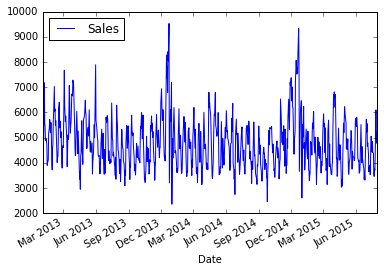

In [7]:
import pandas as pd

%matplotlib inline

# Load the data and set the DateTime index
data = pd.read_csv('../assets/datasets/rossmann.csv', skipinitialspace=True)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter to Store 1
store1_data = data[data.Store == 1]

# Filter to open days
store1_open_data = store1_data[store1_data.Open==1]

# Plot the sales over time
store1_open_data[['Sales']].plot()

In [8]:
store1_data.Sales.autocorr(lag=1) # -0.12
store1_data.Sales.autocorr(lag=2) # -0.03

-0.034787155707946944

In [9]:
for x in range(1,11):
    print(store1_data.Sales.autocorr(lag=x))

-0.127325143391
-0.0347871557079
0.064736112913
-0.00181144791099
-0.109457935289
-0.229639355765
0.630719243284
-0.242483722508
-0.150189713924
0.00630762389379


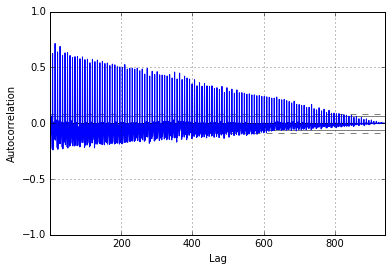

In [10]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(store1_data.Sales)

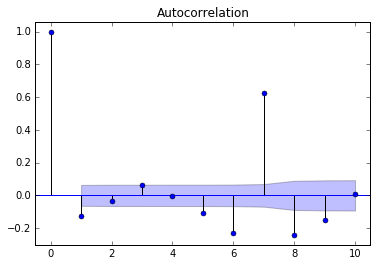

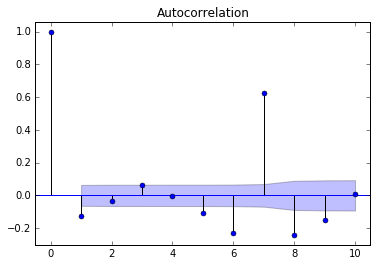

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store1_data.Sales, lags=10)

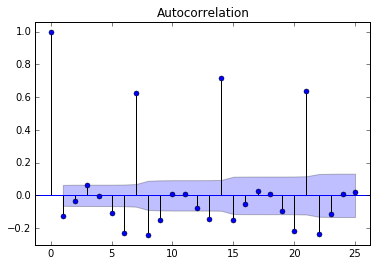

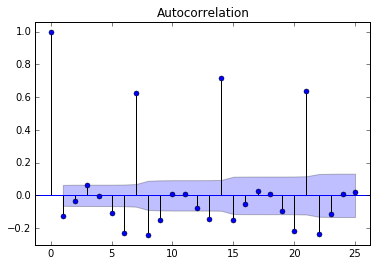

In [12]:
plot_acf(store1_data.Sales, lags=25)


In [13]:
from statsmodels.tsa.arima_model import ARMA

store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 0)).fit()
model.summary()

/Users/JosephNelson/anaconda2/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.6-x86_64.egg/statsmodels/tsa/base/tsa_model.py:229: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Tue, 02 May 2017   AIC                          12540.651
Time:                        12:12:49   BIC                          12554.633
Sample:                             0   HQIC                         12546.029
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4761.9579     82.984     57.384      0.000    4599.312    4924.604
ar.L1.Sales     0.6822      0.026     26.122      0.000       0.631       0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
model = ARMA(store1_sales_data, (2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(2, 0)   Log Likelihood               -6267.032
Method:                       css-mle   S.D. of innovations            738.800
Date:                Tue, 02 May 2017   AIC                          12542.063
Time:                        12:13:26   BIC                          12560.705
Sample:                             0   HQIC                         12549.233
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.3980     85.262     55.856      0.000    4595.287    4929.509
ar.L1.Sales     0.6634      0.036     18.537      0.000       0.593       0.734
ar.L2.Sales     0.0275      0.036      0.767      0.443      -0.043       0.098
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4235           +0.0000j            1.4235            0.0000
AR.2          -25.5833           +0.0000j           25.5833            0.5000
-----------------------------------------------------------------------------
"""

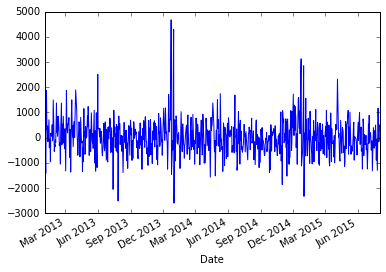

In [16]:
model.resid.plot()

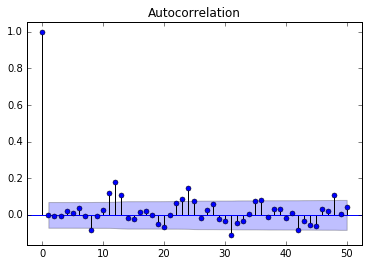

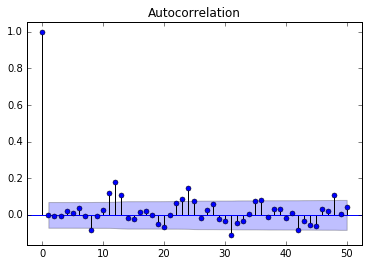

In [17]:
plot_acf(model.resid, lags=50)

In [22]:
model = ARMA(store1_sales_data, (7, 2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(7, 2)   Log Likelihood               -6208.144
Method:                       css-mle   S.D. of innovations            684.487
Date:                Tue, 02 May 2017   AIC                          12438.288
Time:                        12:23:38   BIC                          12489.554
Sample:                             0   HQIC                         12458.005
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4749.9201     83.467     56.908      0.000    4586.328    4913.512
ar.L1.Sales     2.3058      0.044     51.906      0.000       2.219       2.393
ar.L2.Sales    -1.9065      0.100    -19.054      0.000      -2.103      -1.710
ar.L3.Sales     0.3199      0.109      2.927      0.004       0.106       0.534
ar.L4.Sales     0.5924      0.106      5.587      0.000       0.385       0.800
ar.L5.Sales    -0.7965      0.108     -7.345      0.000      -1.009      -0.584
ar.L6.Sales     0.5472      0.092      5.955      0.000       0.367       0.727
ar.L7.Sales    -0.1351      0.039     -3.451      0.001      -0.212      -0.058
ma.L1.Sales    -1.6657      0.027    -62.810      0.000      -1.718      -1.614
ma.L2.Sales     0.9146      0.032     28.639      0.000       0.852       0.977
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2910           -0.0000j            1.2910           -0.5000
AR.2            0.1023           -1.4437j            1.4473           -0.2387
AR.3            0.1023           +1.4437j            1.4473            0.2387
AR.4            0.8778           -0.4960j            1.0083           -0.0819
AR.5            0.8778           +0.4960j            1.0083            0.0819
AR.6            1.2843           -0.0000j            1.2843           -0.0000
AR.7            2.0958           -0.0000j            2.0958           -0.0000
MA.1            0.9107           -0.5139j            1.0457           -0.0818
MA.2            0.9107           +0.5139j            1.0457            0.0818
-----------------------------------------------------------------------------
"""

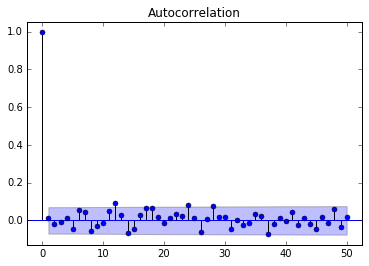

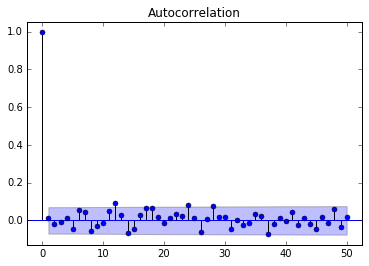

In [23]:
plot_acf(model.resid, lags=50)